In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from duckdb.experimental.spark.sql.functions import like
from skimpy import skim

In [11]:
data = pd.read_csv('../data/digital_marketing_campaign_dataset.csv')

In [12]:
data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [31]:
data.shape

(8000, 20)

There are 8000 rows and 20 columns in our data.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

##### **Discrete Numerical Variables:** // Integers, Countable Variables
* Age
* WebSiteVisits
* SocialShares
* EmailOpens
* EmailClicks
* PreviousPurchases
* Conversion(Target)

##### **Continous Numerical Variables:** // Floats, Measurable Variables
* Income
* Adspend
* ConversionRate
* ClickThroughRate
* PagesPerVisit
* TimeOnSite
* LoyaltyPoints

##### **Categorical Variables:**
* Gender
* CampaignType
* CampaignChannel
* AdvertisingPlatform
* AdvertisingTool



There are 14 numerical, 5 categorical columns.

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,8000.0,11999.500000,2309.545410,8000.000000,9999.750000,11999.500000,13999.250000,15999.000000
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000000
AdSpend,8000.0,5000.944830,2838.038153,100.054813,2523.221165,5013.440044,7407.989369,9997.914781
ClickThroughRate,8000.0,0.154829,0.084007,0.010005,0.082635,0.154505,0.228207,0.299968
ConversionRate,8000.0,0.104389,0.054878,0.010018,0.056410,0.104046,0.152077,0.199995
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000000
PagesPerVisit,8000.0,5.549299,2.607358,1.000428,3.302479,5.534257,7.835756,9.999055
TimeOnSite,8000.0,7.727718,4.228218,0.501669,4.068340,7.682956,11.481468,14.995311
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000000


In [36]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8000   │ │ int64       │ 10    │                                                          │
│ │ Number of columns │ 20     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column             ┃ NA  ┃ NA % ┃ mean   ┃ sd      ┃ p0      ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ CustomerID         │   0 │    0 │  12000 │    2310 │    8000 │   10000 │  12000 │  14000 │  16000 │ ██████ │  │
│ │ Age                │   0 │    0 │  43.63 │    14.9 │      18 │      31 │     43 │     56 │     69 │ ▇▇█▇▇█ │  │
│ │ Income             │   0 │    0 │  84660 │   37580 │   20010 │   51740 │  84930 │ 116800 │ 150000 │ █▇████ │  │
│ │ AdSpend            │   0 │    0 │   5001 │    2838 │   100.1 │    2523 │   5013 │   7408 │   9998 │ █████▇ │  │
│ │ ClickThroughRate   │   0 │    0 │ 0.1548 │ 0.08401 │    0.01 │ 0.08263 │ 0.1545 │ 0.2282 │    0.3 │ ████▇█ │  │
│ │ ConversionRate     │   0 │    0 │ 0.1044 │ 0.05488 │ 0.01002 │ 0.05641 │  0.104 │ 0.1521 │    0.2 │ ██████ │  │
│ │ WebsiteVisits      │   0 │    0 │  24.75 │   14.31 │       0 │      13 │     25 │     37 │     49 │ ▇▇▇▇▇█ │  │
│ │ PagesPerVisit      │   0 │    0 │  5.549 │   2.607 │       1 │   3.302 │  5.534 │  7.836 │  9.999 │ ▇██▇██ │  │
│ │ TimeOnSite         │   0 │    0 │  7.728 │   4.228 │  0.5017 │   4.068 │  7.683 │  11.48 │     15 │ ████▇█ │  │
│ │ SocialShares       │   0 │    0 │   49.8 │    28.9 │       0 │      25 │     50 │     75 │     99 │ ███▇██ │  │
│ │ EmailOpens         │   0 │    0 │  9.477 │   5.711 │       0 │       5 │      9 │     14 │     19 │ █▆▇▆▆█ │  │
│ │ EmailClicks        │   0 │    0 │  4.467 │   2.857 │       0 │       2 │      4 │      7 │      9 │ █▄█▄█▇ │  │
│ │ PreviousPurchases  │   0 │    0 │  4.486 │   2.888 │       0 │       2 │      4 │      7 │      9 │ █▄█▄██ │  │
│ │ LoyaltyPoints      │   0 │    0 │   2490 │    1430 │       0 │    1255 │   2497 │   3702 │   4999 │ ▇███▇▇ │  │
│ │ Conversion         │   0 │    0 │ 0.8765 │   0.329 │       0 │       1 │      1 │      1 │      1 │ ▁    █ │  │
│ └────────────────────┴─────┴──────┴────────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per  ┃ total     ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row        ┃ words     ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Gender    │  0 │    0 │ Male      │ Female    │ Fema

From this we can say basic analysis like:
1. [x] Age columns ranges between 18-69
2. [x] AVG Income of peoples in this data $84,664

3. [x] LoyaltPoints range between 0-5000
4. [x] Conversion is either 1-0
5. [x] Amount spend on advertisements ranges between $100-10000

In [39]:
print(f"Total duplicate rows : {data.duplicated().sum()}")

Total duplicate rows : 0


##### Identifying Unique Values From The Categorical Colums in Data

In [51]:
categorical_columns = data.select_dtypes(include='object').columns

for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"{column} : {unique_values}\n")

Gender : ['Female' 'Male']

CampaignChannel : ['Social Media' 'Email' 'PPC' 'Referral' 'SEO']

CampaignType : ['Awareness' 'Retention' 'Conversion' 'Consideration']

AdvertisingPlatform : ['IsConfid']

AdvertisingTool : ['ToolConfid']



As we can see the code above:
'AdvertisingPlatform' and 'AdvertisingTool' are confidential columns which we don't need to use for our model is why we're going to drop along with 'CustomerID' column.


In [52]:
data = data.drop(['AdvertisingPlatform', 'AdvertisingTool', 'CustomerID'], axis = 1)

In [53]:
data.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


##### Observing Outlier Values From Numerical Columns in Data

In [87]:
def plot_boxplots(data, numerical_cols, n_cols=3):
    """Sayısal değişkenler için box-plot grafikleri oluşturur.
    Aykırı değerlerin (outliers) görsel olarak saptanmasını sağlar.


    :param data : Veri çerçevesi (pd.DataFrame).
    :param numerical_cols : Box-plot çizilecek sayısal sütun isimleri listesi (list).
    :param n_cols : Yan yana kaç grafik gösterileceği (int).(default = 3)
    :return:
    """
    # Style: Arka plan bembeyaz,ızgara yok.
    sns.set_style('white')

    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 5* n_rows))
    axes = axes.flatten()

    for i,col in enumerate(numerical_cols):
        sns.boxplot(ax = axes[i],
                    x=data[col],
                    color = 'skyblue',
                    linewidth=1.5,
                    whiskerprops=dict(color = '#1D3557', linewidth = 1.5),
        )

        axes[i].set_title(f'{col} - Outlier Analysis', fontsize = 12)
        axes[i].set_xlabel('')

    # Boş kalan subplotları temizle.
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [82]:
numerical_columns = data.select_dtypes(include=['int64','float64']).columns
numerical_columns = numerical_columns.drop(['Conversion'])

In [83]:
numerical_columns

Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints'],
      dtype='object')

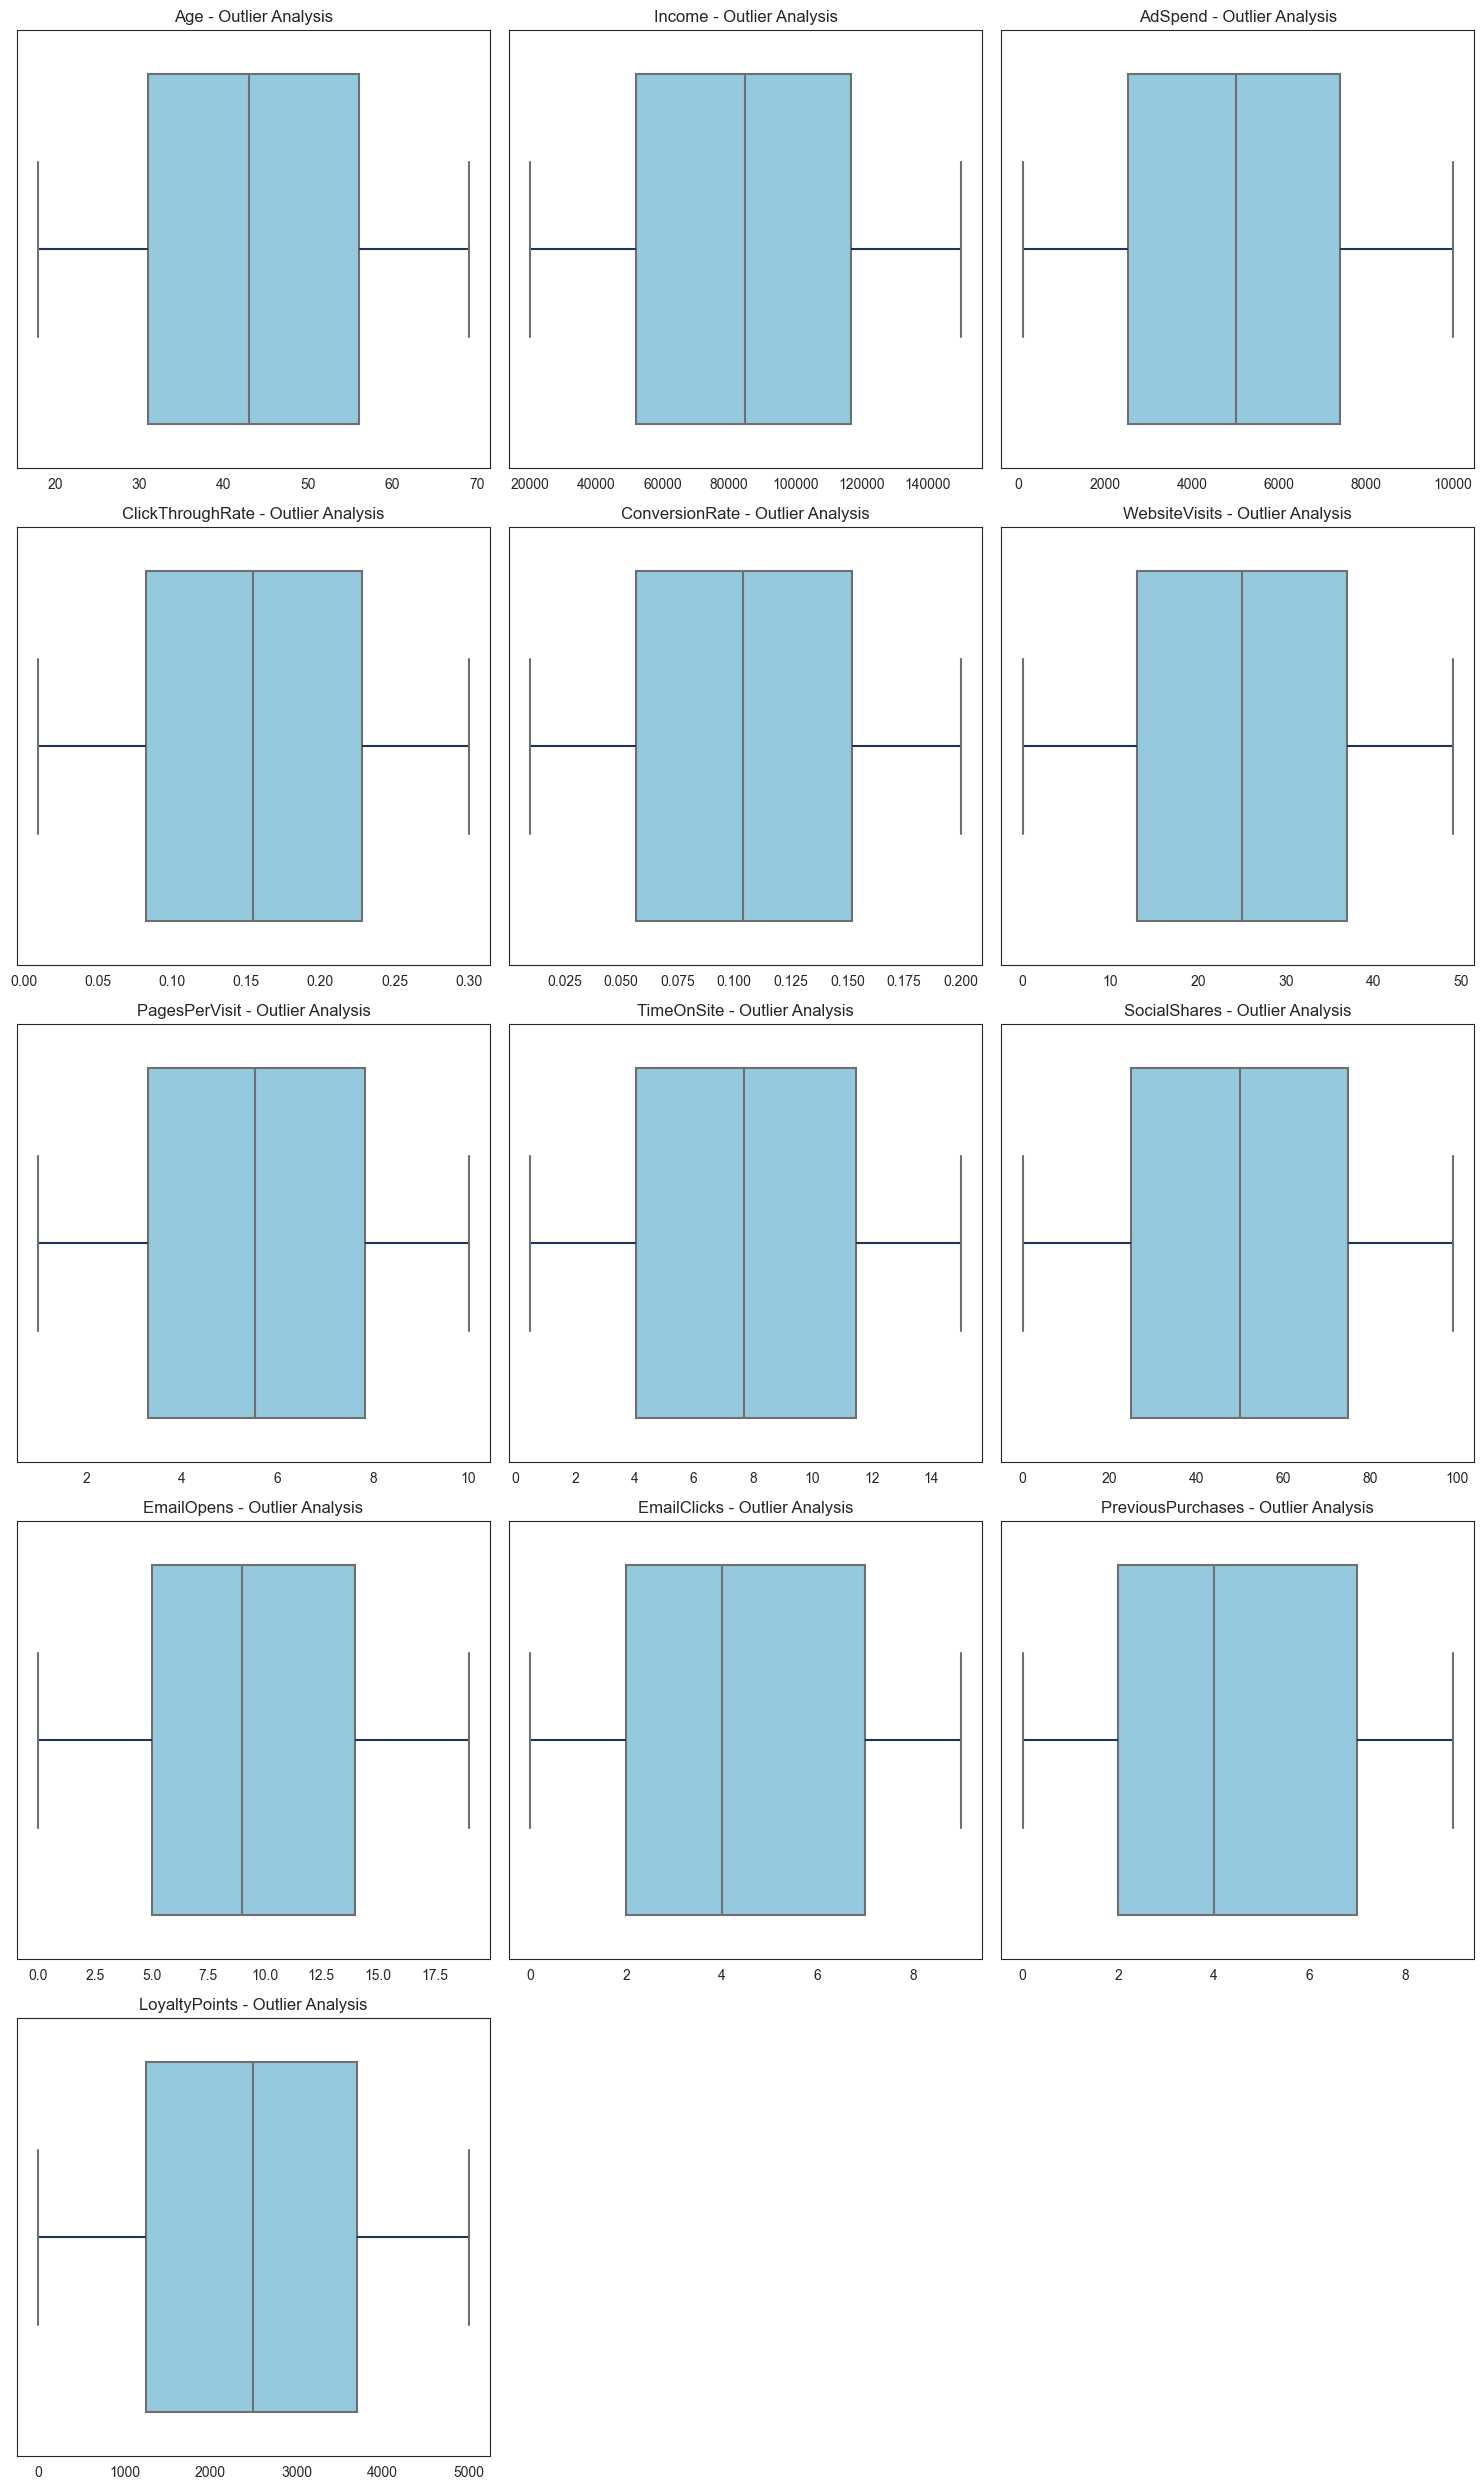

In [88]:
plot_boxplots(data, numerical_columns)

Throught this we identify that there exist no outliers in our data.